In [534]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [535]:
df= pd.read_csv('../Data/Frozen_Dessert_Production.csv',index_col='DATE',parse_dates=True)

In [536]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [537]:
df.columns= ['Production']

In [538]:
df.head()

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


<AxesSubplot:xlabel='DATE'>

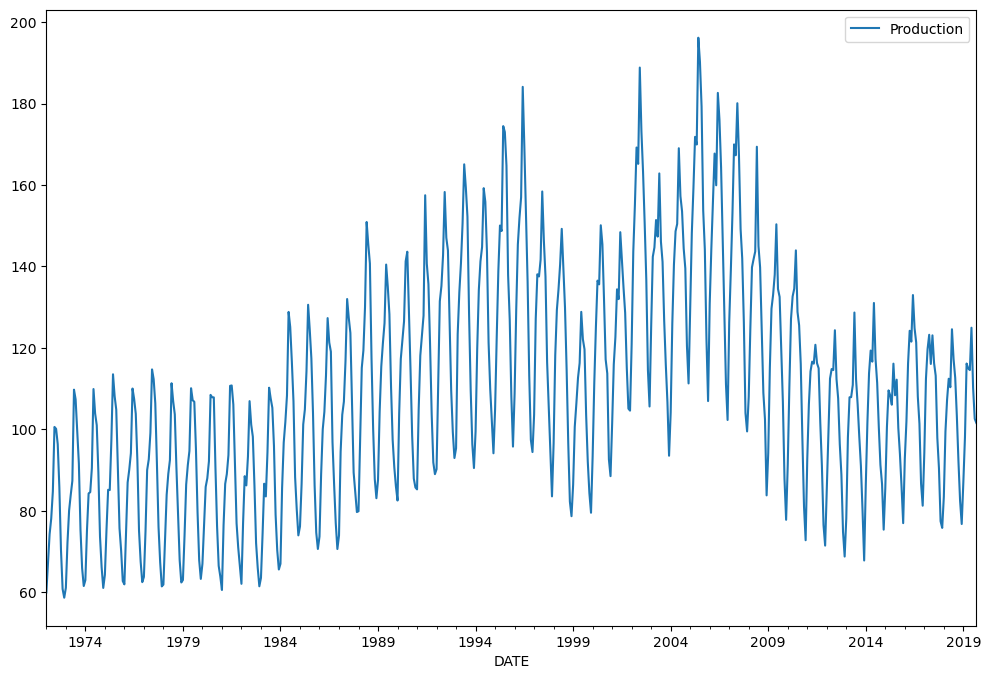

In [539]:
df.plot(figsize=(12,8))

In [540]:
len(df)

573

In [541]:
test_size= 18

In [542]:
test_ind= len(df)-test_size

In [543]:
train= df.iloc[:test_ind]

In [544]:
test= df.iloc[test_ind:]

In [545]:
len(test)

18

In [546]:
from sklearn.preprocessing import MinMaxScaler

In [547]:
scaler= MinMaxScaler()

In [548]:
scaler.fit(train)

MinMaxScaler()

In [549]:
scaled_train= scaler.fit_transform(train)

In [550]:
scaled_test= scaler.fit_transform(test)

In [551]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [552]:
length=12
n_features=1

generator= TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [553]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [554]:
model= Sequential()

model.add(LSTM(200,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [555]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 200)               161600    
                                                                 
 dense_24 (Dense)            (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [556]:
validation_generator= TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [557]:
from tensorflow.keras.callbacks import EarlyStopping

In [558]:
early_stop= EarlyStopping(monitor='val_loss',patience=2)

In [559]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20


C:\Users\User\AppData\Local\Temp\ipykernel_21956\3786894748.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])


543/543 [==============================] - 6s 8ms/step - loss: 0.0235 - val_loss: 0.0271
Epoch 2/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0085 - val_loss: 0.0133
Epoch 3/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0054 - val_loss: 0.0240
Epoch 4/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0053 - val_loss: 0.0157


In [560]:
losses= pd.DataFrame(model.history.history)

<AxesSubplot:>

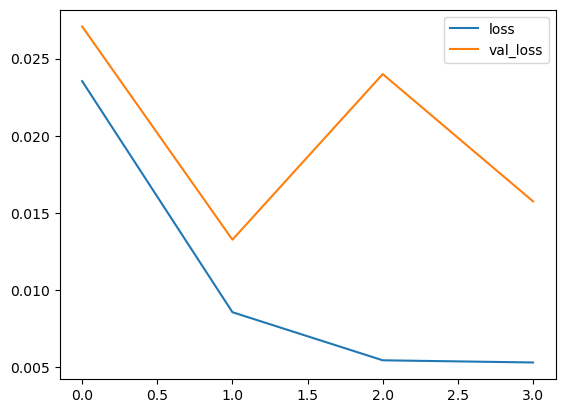

In [561]:
losses.plot()

In [562]:
test_predictions=[]

first_eval_batch= scaled_train[-length:]
current_batch= first_eval_batch.reshape(1,length,n_features)

for i in range (len(test)):
    
    current_pred= model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch= np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [563]:
true_predictions= scaler.inverse_transform(test_predictions)

In [564]:
test['Predictions']= true_predictions

C:\Users\User\AppData\Local\Temp\ipykernel_21956\715416204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']= true_predictions


In [565]:
test

,Production,Predictions
DATE,,
2018-04-01,112.4309,97.015210
2018-05-01,110.3544,98.670867
2018-06-01,124.5841,99.579108
2018-07-01,117.2215,98.788861
2018-08-01,112.6779,95.969321
2018-09-01,103.3118,91.237302
2018-10-01,92.1321,87.591965
2018-11-01,82.4347,85.071144
2018-12-01,76.7608,84.571415


<AxesSubplot:xlabel='DATE'>

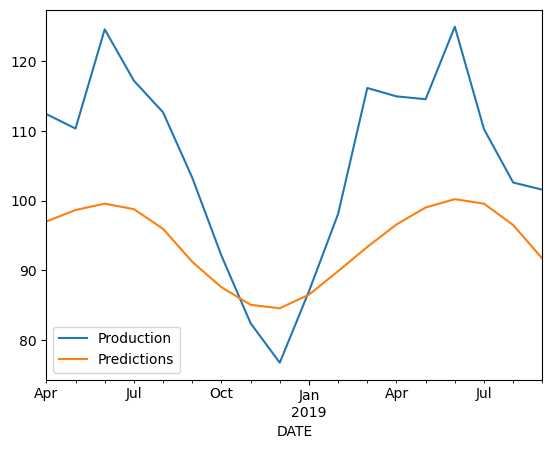

In [566]:
test.plot()

In [567]:
from sklearn.metrics import mean_squared_error

In [568]:
np.sqrt(mean_squared_error(test['Production'],test['Predictions']))

14.682639006552247

In [569]:
full_scaler= MinMaxScaler()

In [570]:
scaled_full_data= full_scaler.fit_transform(df)

In [571]:
length=12

generator= TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [572]:
model= Sequential()

model.add(LSTM(200, activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [573]:
model.fit_generator(generator,epochs=5)

Epoch 1/5


C:\Users\User\AppData\Local\Temp\ipykernel_21956\1246993970.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=5)


561/561 [==============================] - 7s 8ms/step - loss: 0.0223
Epoch 2/5
561/561 [==============================] - 4s 7ms/step - loss: 0.0078
Epoch 3/5
561/561 [==============================] - 4s 8ms/step - loss: 0.0044
Epoch 4/5
561/561 [==============================] - 4s 7ms/step - loss: 0.0042
Epoch 5/5
561/561 [==============================] - 4s 8ms/step - loss: 0.0043


In [574]:
forecast = []
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    
    current_pred = model.predict(current_batch)[0]
    
    
    forecast.append(current_pred) 
    
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 27ms/step


In [575]:
forecast= scaler.inverse_transform(forecast)

In [576]:
df.tail()

,Production
DATE,
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,101.5866


In [577]:
forecast_index= pd.date_range(start='2019-10-01', periods=periods,freq='MS')

In [578]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [579]:
forecast_df= pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

In [580]:
forecast_df

,Forecast
2019-10-01,88.254664
2019-11-01,86.056480
2019-12-01,85.367102
2020-01-01,87.108204
2020-02-01,90.435877
2020-03-01,93.436192
2020-04-01,95.143395
2020-05-01,96.724279
2020-06-01,97.303030
2020-07-01,95.648003


(588.0, 611.0)

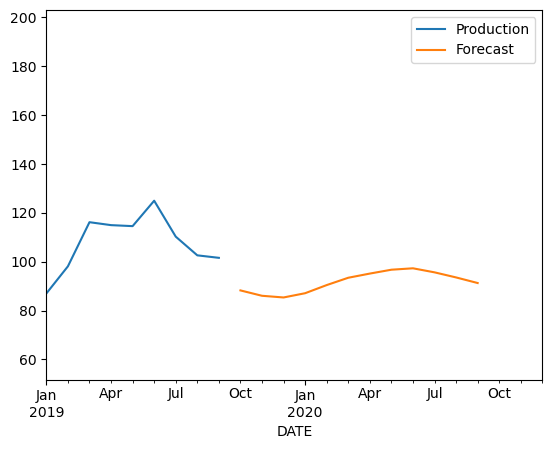

In [581]:
ax= df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2019-01-01','2020-12-01')